<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

``Чтобы при перезапуске кода получать идентичные результаты.``

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
display(df_train.columns[df_train.isna().any()])
display(df_test.columns[df_test.isna().any()])

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [4]:
display(df_train.duplicated().any())
display(df_test.duplicated().any())

True

True

In [5]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df_train)
# profile.to_file('profile_report.html')

`Изучив файл, можно сказать, что высокую корреляцию между собой имеют признаки: пробег и год, цена и трансмиссия, цена и год. Признак тип продавца несбалансирован. 7% данных дублицированы.`

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [6]:
display(df_train.describe(exclude='object'))
display(df_test.describe(exclude='object'))

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [7]:
display(df_train.describe(include='object'))
display(df_test.describe(include='object'))

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


``Средние и медианы в обоих кадрах данных сильно не отличаются, что говорит о низком количестве выбросов в данных. Возможное исключение - признак цены продажи, но и слишком аномальных значений там не наблюдается.``

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [x] Отобразите такие объекты (0.05 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [8]:
df_train_no_target = df_train.drop(columns=['selling_price']).copy()
df_train_no_target.duplicated().sum()

1159

In [9]:
df_train_no_target[df_train_no_target.duplicated()].head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0


In [10]:
df_train.drop_duplicates(subset=df_train_no_target.columns, keep='first', inplace=True)

In [11]:
df_train.reset_index(inplace=True, drop=True)

In [12]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [13]:
df_train.replace(to_replace=' bhp', value=0, inplace=True)

df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].apply(
    lambda row: row.str.replace(pat=r'[^\d\.\,]', repl='', regex=True),
    axis=0
)
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].apply(
    lambda row: row.str.replace(pat=r'[^\d\.\,]', repl='', regex=True),
    axis=0
)

In [14]:
df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)

df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)

In [15]:
df_train['max_torque_rpm'] = df_train['torque'].str.split().str[1]
df_train['torque'] = df_train['torque'].str.split().str[0]

df_test['max_torque_rpm'] = df_test['torque'].str.split().str[1]
df_test['torque'] = df_test['torque'].str.split().str[0]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою - верный вариант ответа. Мы не можем допустить утечки данных
 - По тренировочным данным для `train` и `test`

In [16]:
df_train[['mileage', 'engine', 'max_power', 'seats']] = df_train[['mileage', 'engine', 'max_power', 'seats']].fillna(
    value=df_train[['mileage', 'engine', 'max_power', 'seats']].median()
)
df_test[['mileage', 'engine', 'max_power', 'seats']] = df_test[['mileage', 'engine', 'max_power', 'seats']].fillna(
    value=df_test[['mileage', 'engine', 'max_power', 'seats']].median()
)

``Медианой удобнее пользоваться, так как она более устойчива к выбросам. Вообще мы могли бы применить среднее, так как раннее было показано, что наши данные не имеют выраженных выбросов.``

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [17]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

`Seats (кол-во сидений) можно рассматривать как категориальный признак, так как для каждой машины у нас есть фиксированное число сидений, и в зависимости от их числа можно выделить разные категории автомобилей (от автобусов до спорткаров).`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [18]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


`Я не вижу предпосылок для того, чтобы предполагать, что заполнение пропусков сдвинуло наши распределения. Во первых, пропусков было не так уж и много - всего 1/6 от наших данных, во вторых, мы заполнили пропуски медианой, что наоборот должно укрепить изначальные распределения.`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

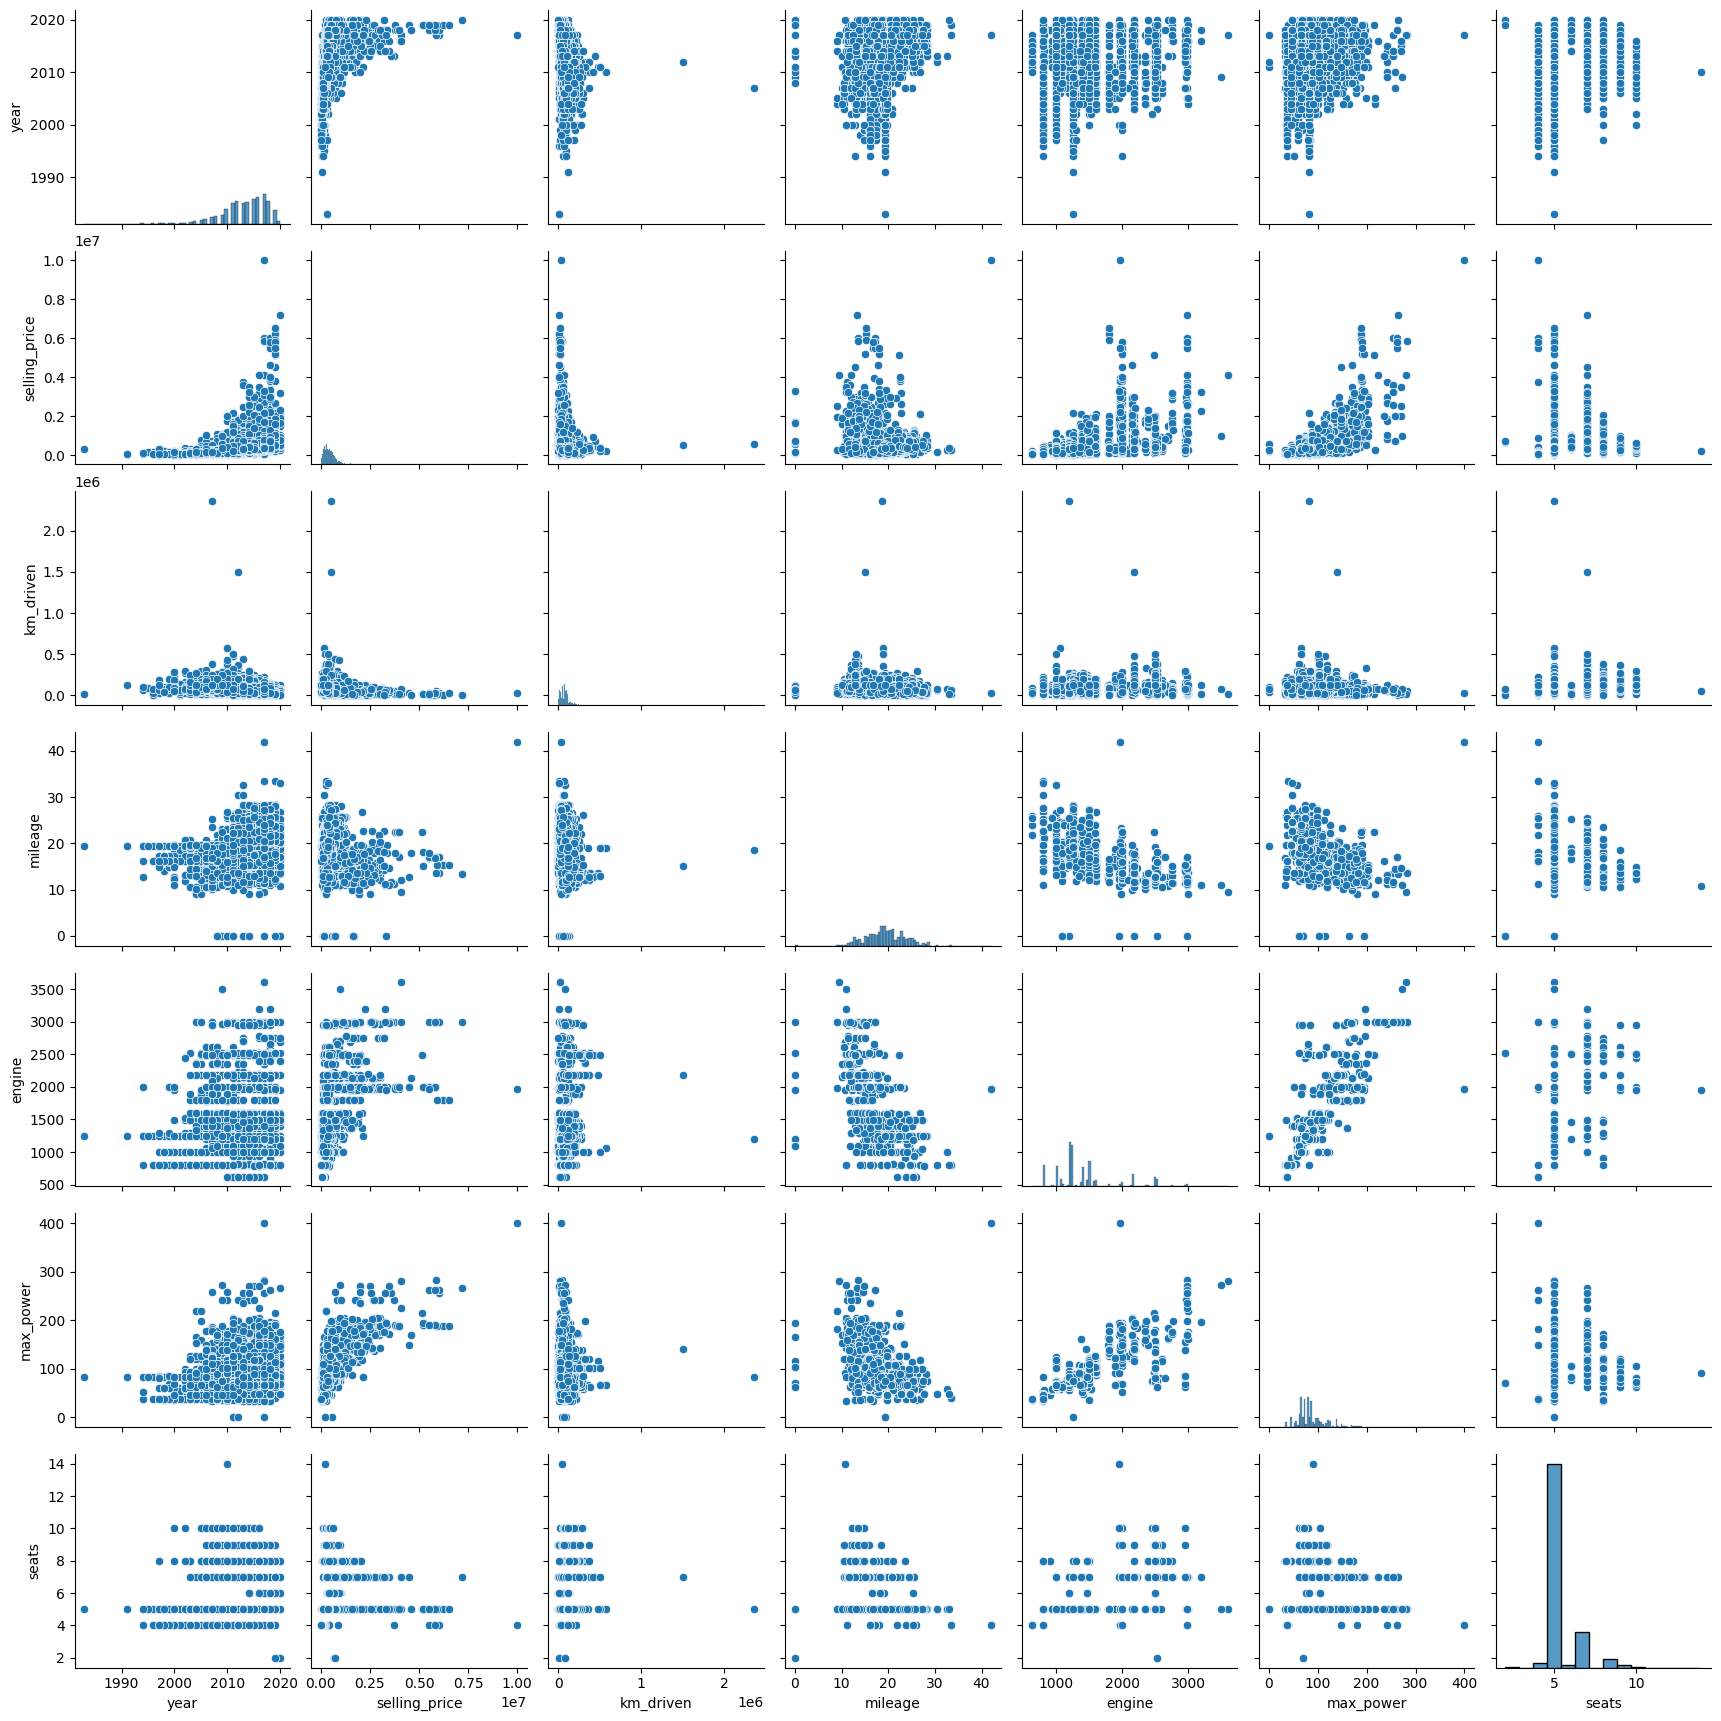

In [19]:
sns.pairplot(data=df_train)

`Мы видим явную зависимость цены продажи от таких признаков: год, пробег, расход топлива, максимальная мощность и кол-во сидений. Можно выдвинуть гипотезу о корреляции признаков, например, если посмотреть на следующие пары признаков: расход топлива - двигатель, максимальная мощность - двигатель.`

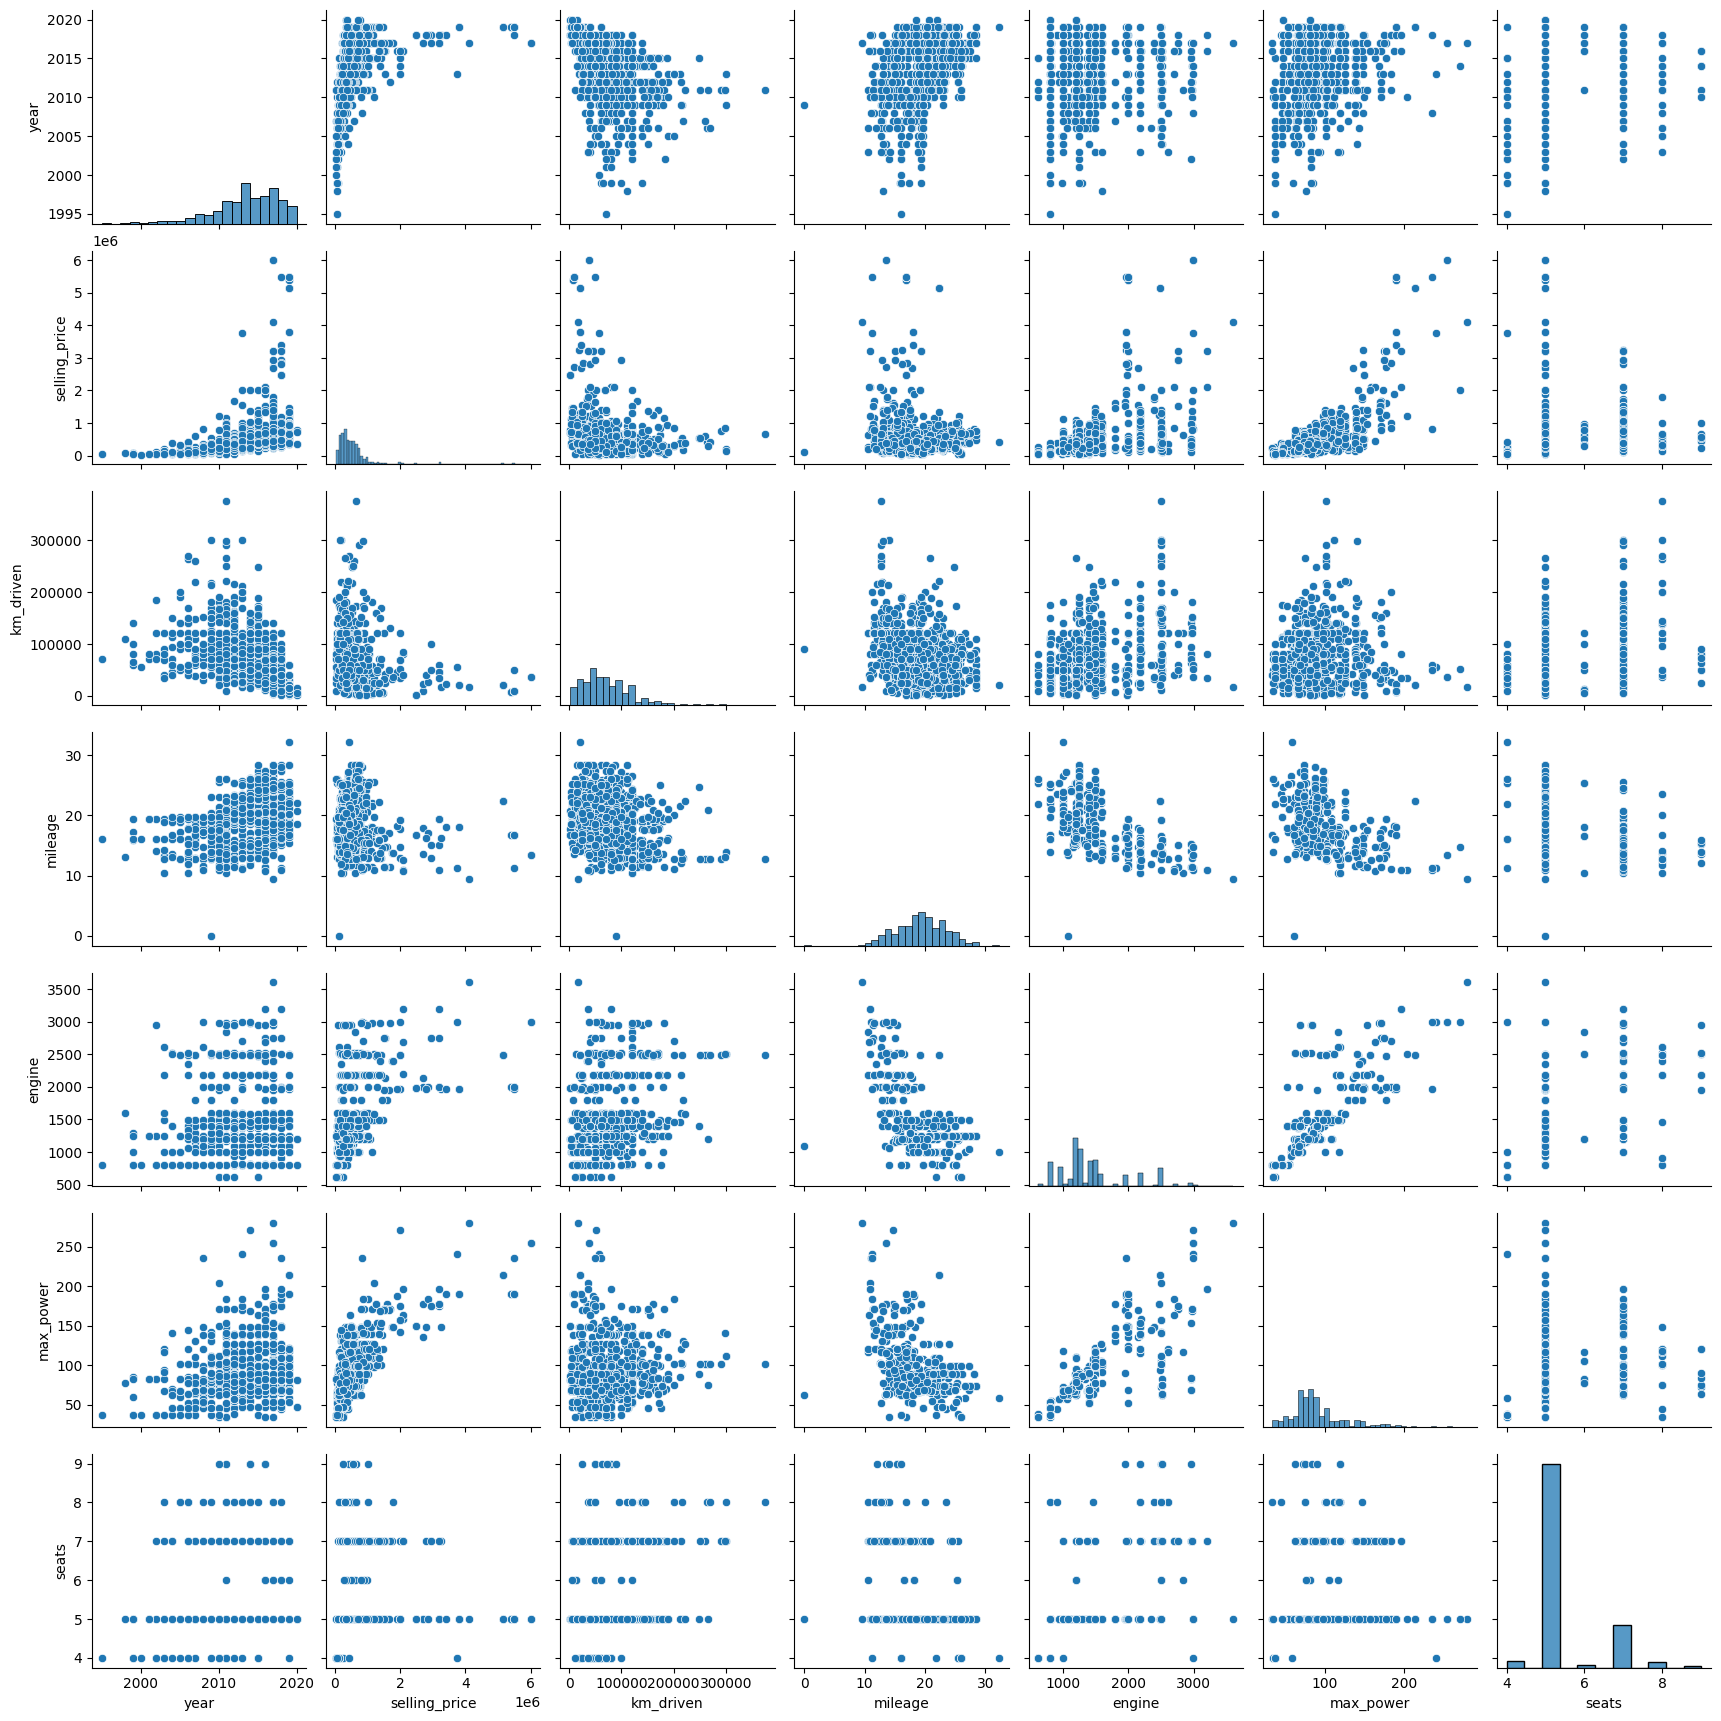

In [20]:
sns.pairplot(data=df_test)

`Распределения оказались примерно похожими, но всё же с некоторыми различиями: посмотрим на распределение зависимости цены от пробега и увидим, что они довольно сильно отличаются (в тестовых данных лучше видна корреляция). Сложилось впечатление, что в тестовых данных распределения разнообразнее.`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [21]:
df_train_pearson = df_train.corr(numeric_only=True)
df_train_pearson

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


<Axes: >

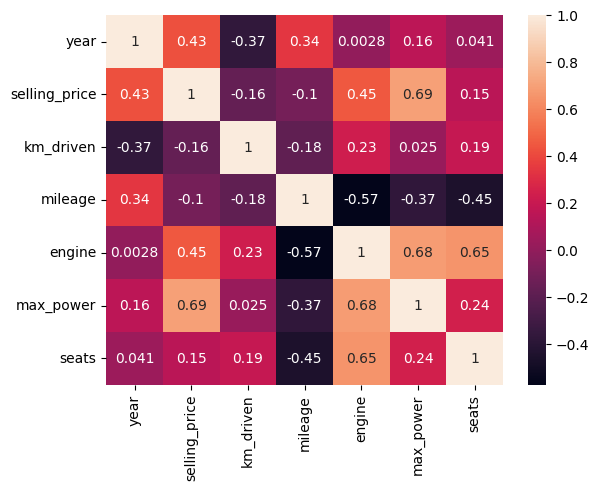

In [22]:
sns.heatmap(data=df_train_pearson, annot=True)

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Наименее скоррелированы между собой признаки год и двигатель. Наиболее сильная положительная линейная зависимость наблюдается между максимальной мощностью и ценой, между максимальной мощностью и двигателем, между кол-вом сидений и двигателем. Да, можно так утверждать, так как корреляция отрицательная и значительная (-0.37).`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты

In [23]:
def spearman_correlation(x: np.ndarray, y: np.ndarray) -> float:
    x = np.array(x)
    y = np.array(y)
    
    x_ranks = np.argsort(np.argsort(x))
    y_ranks = np.argsort(np.argsort(y))
    
    n = len(x_ranks)
    covariance = np.sum((x_ranks - np.mean(x_ranks)) * (y_ranks - np.mean(y_ranks))) / n
    std_x = np.std(x_ranks, ddof=0)
    std_y = np.std(y_ranks, ddof=0)
    
    return covariance / (std_x * std_y)

x = [13410, 2056, 352, 40, 510]
y = [155, 256, 3541623, 415, 50]

print(spearman_correlation(x, y))
display(pd.DataFrame(data=[x,y]).T.corr(method='spearman'))

-0.5999999999999999


,0,1
0,1.0,-0.6
1,-0.6,1.0


/home/boyarskikhae/.local/lib/python3.13/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


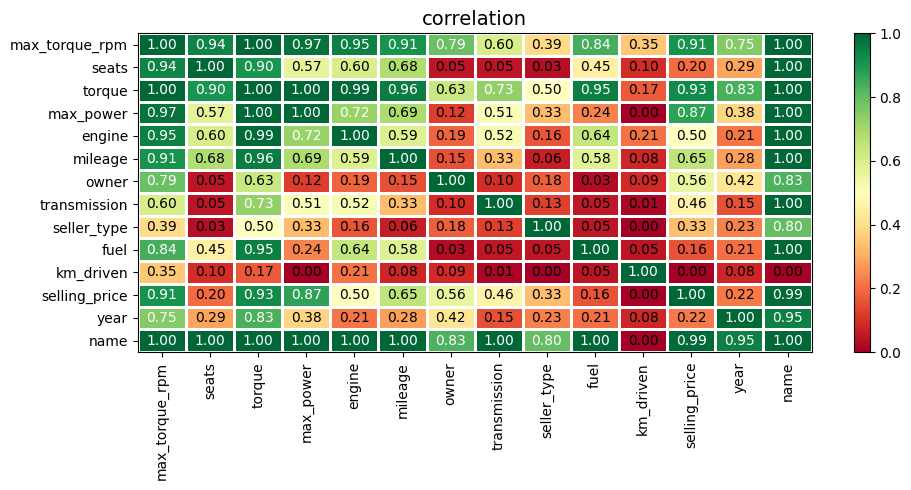

In [24]:
import phik
from phik.report import plot_correlation_matrix


df_phik = df_train.phik_matrix(
    interval_cols=['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'],
    njobs=-1
)
plot_correlation_matrix(
    df_phik.values,
    x_labels=df_phik.columns,
    y_labels=df_phik.index,
    vmin=0,
    vmax=1,
    figsize=(10, 5)
)

`По матрице корреляций phik мы видим новые корреляции категориальных признаков. Таким образом, почти все категориальные признаки сильно коррелируют друг с другом, возможно, это связано с тем, что определённый виды машин имеют определённые характеристики.`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

`Самая значительная корреляция у пары максимальная мощность - цена. Логично посмотреть на кол-во выбросов в рамках максимальной мощности, чтобы понять, с какими данными мы имеем дело.`

<Axes: >

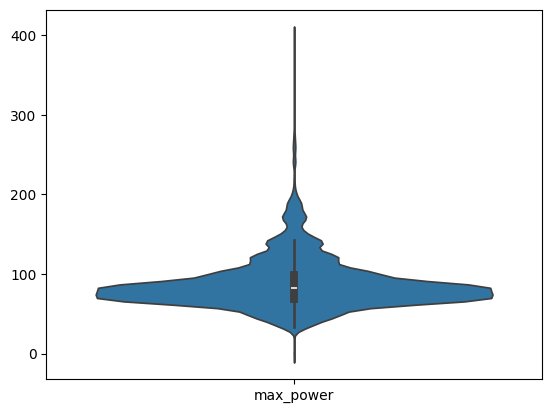

In [25]:
sns.violinplot(data=df_train[['max_power']])

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [26]:
df_train_numeric = df_train.select_dtypes(exclude='object').copy()
df_test_numeric = df_test.select_dtypes(exclude='object').copy()

In [27]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

In [28]:
assert X_train.shape == (5840, 6)

In [29]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

In [30]:
assert X_test.shape == (1000, 6)

### **Задание 12 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
def business_metrics(y_true, y_pred) -> float:
    errors = np.abs(y_pred - y_true) / y_true

    return np.sum(errors <= 0.1) / len(y_true)

In [32]:
def your_business_metrics(y_true, y_pred, penalty: float=2) -> float:
    underpredictions = y_pred < y_true
    overpredictions = y_pred >= y_true

    underpredictions_ratio = np.sum(underpredictions) / len(y_true) * penalty
    overpredictions_ratio = np.sum(overpredictions) / len(y_true)

    return underpredictions_ratio + overpredictions_ratio

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression()

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941419681125437
MSE = 233298786264.12817
Business metric = 0.227
My business metric = 1.6975000000000002


`R^2 не самый лучший, но тем не менее модель хорошо описывает дисперсию целевой переменной. По MSE трудно что-то сказать, так как значения взяты в квадрате, поэтому лучше опираться на R^2.`

### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [34]:
def my_r2(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return 1 - ((np.sum((y_pred - y_true) ** 2)) / (np.sum((y_true - np.mean(y_true)) ** 2)))

print('My R^2 =', my_r2(y_true=y_test, y_pred=y_pred))

My R^2 = 0.5941419681125437


`В числителе у нас сумма квадратичных отклонений предсказанных значений от действительных, в знаменателе - сумма квадратичных разниц между действительным значением и средним значением. По сути это MSE без деления на n, делённая на дисперсию целевой переменной, что позволяет интерпретировать метрику как долю дисперсии целевой переменной, объясняемую моделью.`

### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [35]:
def adjusted_r2(y_true: np.ndarray, y_pred: np.ndarray, num_predictors: int) -> float:
    n = len(y_true)
    
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    
    r2 = 1 - (ss_residual / ss_total)
    
    r2_adj = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    
    return r2_adj


y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
num_predictors = 2


r2_adj = adjusted_r2(y_true, y_pred, num_predictors)
print("Adjusted R^2:", r2_adj)

Adjusted R^2: 0.8458244111349038


`Adjusted R^2 улучшает интерпретацию R^2 при наличии нескольких независимых переменных. В отличие от обычного R2R2, который всегда увеличивается при добавлении новых предикторов, adjusted R^2 учитывает сложность модели (количество весов) и штрафует за добавление лишних предикторов.`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [36]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X=X_train)
X_test_scaled = scaler.transform(X=X_test)


model = LinearRegression()

model.fit(X=X_train_scaled, y=y_train)
y_pred = model.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941419681125579
MSE = 233298786264.12
Business metric = 0.227
My business metric = 1.6975000000000002


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [37]:
X_train.columns[model.coef_.argmax()]

'max_power'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [38]:
from sklearn.linear_model import Lasso


model = Lasso()

model.fit(X=X_train_scaled, y=y_train)
y_pred = model.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941407998542257
MSE = 233299457812.36972
Business metric = 0.227
My business metric = 1.6975000000000002


`Метрики не стали лучше.`

In [39]:
model.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

`Модель не занулила никакие веса. Возможно дело в том, что каждый признак модели вносит свой вклад в результат, и получается, что занулять нечего, лишних признаков нет.`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [40]:
%%time

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


model = Lasso()


param_grid = {
    'alpha': np.arange(start=1, stop=10, step=0.5, dtype=int) 
}
gscv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)

gscv.fit(X=X_train_scaled, y=y_train)
y_pred = gscv.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

print(gscv.best_params_)
print(gscv.best_estimator_.coef_)

R^2 = 0.5941407998542257
MSE = 233299457812.36972
Business metric = 0.227
My business metric = 1.6975000000000002
{'alpha': 1}
[152772.3902142  -44157.68985794  28832.04339588  61173.66240922
 322808.23691947 -23206.25564908]
CPU times: user 316 ms, sys: 15.6 ms, total: 331 ms
Wall time: 367 ms


`Грид-сёрч обучает модель в среднем за 350ms, в сетке я использовал только alpha, которая контролирует степень регуляризации. Лучший коэффициент регуляризации - 1. Веса опять не занулились.`

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [41]:
%%time


model = ElasticNet()


param_grid = {
    'alpha': np.arange(start=1, stop=10, step=0.5, dtype=int),
    'l1_ratio': np.arange(start=0.1, stop=1, step=0.1, dtype=float)
}
gscv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)

gscv.fit(X=X_train_scaled, y=y_train)
y_pred = gscv.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

print(gscv.best_params_)

R^2 = 0.5722225171629226
MSE = 245898712593.88663
Business metric = 0.241
My business metric = 1.6900000000000002
{'alpha': 1, 'l1_ratio': 0.9}
CPU times: user 726 ms, sys: 71.8 ms, total: 798 ms
Wall time: 1.41 s


`Грид-сёрч обучает модель в среднем за 2s, лучшие гиперпараметры: alpha - 1, l1_ratio - 0.9.`

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [42]:
X_train_cat = df_train.select_dtypes(include='object').copy()
X_train_cat['brand'] = X_train_cat['name'].str.split().str[0]
X_train_cat.drop(columns=['name', 'torque', 'max_torque_rpm'], inplace=True)

X_test_cat = df_test.select_dtypes(include='object').copy()
X_test_cat['brand'] = X_test_cat['name'].str.split().str[0]
X_test_cat.drop(columns=['name', 'torque', 'max_torque_rpm'], inplace=True)

In [43]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brand
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [44]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')


X_train_cat = pd.DataFrame(encoder.fit_transform(X=X_train_cat))
X_test_cat = pd.DataFrame(encoder.transform(X=X_test_cat))


X_train_cat = pd.concat(objs=[pd.DataFrame(X_train), X_train_cat], axis=1)
X_train_cat.columns = X_train_cat.columns.astype(str)

X_test_cat = pd.concat(objs=[pd.DataFrame(X_test), X_test_cat], axis=1)
X_test_cat.columns = X_test_cat.columns.astype(str)

/home/boyarskikhae/.local/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Корректно обучать OHE на трейне. Один столбец мы удаляем для избежания мультиколлинеарности, которая влечёт за собой проблемы с линейной зависимостью признаков, что влёчёт за собой необратимость матрицы, что влечёт за собой проблемы с расчётом коэффициентов моделью. Я думаю, что в рамках линейных моделей можно удалить признак, который неважен с точки зрения модели, но в этом признаке может быть скрыта нелинейная зависимость.`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [45]:
from sklearn.linear_model import Ridge


model = Ridge()


param_grid = {
    'alpha': np.arange(start=1, stop=10, step=0.5, dtype=int),
}
gscv = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', n_jobs=-1, cv=10)

gscv.fit(X=X_train_cat, y=y_train)
y_pred = gscv.predict(X=X_test_cat)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.7775112124110147
MSE = 127892908415.52505
Business metric = 0.285
My business metric = 1.7049999999999998


`Да, качество модели удалось улучшить, вырос R^2 и упал MSE.`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from math import sqrt


# Загрузка данных.
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

# Обработка данных.
for df in [df_train, df_test]:
    df.replace(to_replace=' bhp', value=0, inplace=True)
    df['max_torque_rpm'] = df['torque'].str.split().str[1]
    df['torque'] = df['torque'].str.split().str[0]
    df[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']] =\
        df[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']].apply(
            lambda row: row.str.replace(pat=r'[^\d\.\,]', repl='', regex=True),
            axis=0
        )
    df['mileage'] = df['mileage'].astype(float)
    df['engine'] = df['engine'].astype(float)
    df['max_power'] = df['max_power'].astype(float)
    df['brand'] = df['name'].str.split().str[0]
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df.replace(r'\,', '.', regex=True, inplace=True)
    df.drop(columns=['name'], inplace=True)


numeric_features = ['km_driven', 'mileage', 'engine', 'max_power', 'torque']
categorical_features = ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']
n_neighbors = int(sqrt(df_train.shape[0]))


numeric_transformer = Pipeline(
    steps=[
        ('feature_selector', VarianceThreshold()),
        ('imputer', KNNImputer(n_neighbors=n_neighbors)),
        ('polynomial_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')),
        ('imputer', KNNImputer(n_neighbors=n_neighbors))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_transformer', numeric_transformer, numeric_features),
        ('categorical_transformer', categorical_transformer, categorical_features)
    ],
    n_jobs=-1
)
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression(n_jobs=-1))
    ]
)


X_train = df_train.drop(columns=['selling_price'])
y_train = df_train['selling_price']

X_test = df_test.drop(columns=['selling_price'])
y_test = df_test['selling_price']


pipeline.fit(X=X_train, y=y_train)
y_pred = pipeline.predict(X=X_test)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('My business metric =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.8502141416062856
MSE = 86101188635.52342
Business metric = 0.257
My business metric = 1.8430000000000002


/home/boyarskikhae/.local/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


`Простой грамотный подход к построению pipeline значительно поднял все метрики, кроме бизнес-метрики.`

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

`Я реализовал расчёт метрики выше, на этапе обучения моделей. Лучший результат показала последняя модель, обученная на данных с категориальными признаками.`

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

`Я реализовал расчёт метрики выше, на этапе обучения модели. Метрика выводит сумму недопрогнозов и перепрогнозов, но со штрафом для недопрогнозов. Чем меньше метрика, тем лучше. Лучший результат показала модель ElasticNet.`